In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
topics=pd.read_csv('./All data/advanced/FieldsOfStudy.txt',sep='\t', header = None,\
                   names = ['topic', 'Rank', 'NormalizedName', 'name', 'MainType', 'Level', 'PaperCount',\
                            'CitationCount', 'CreatedDate'])

In [18]:
topics[topics['name'] == 'Computer science']

,topic,Rank,NormalizedName,name,MainType,Level,PaperCount,CitationCount,CreatedDate
392073,41008148,7234,computer science,Computer science,NaN,0,22305962,119736403,2016-06-24


In [ ]:
chunks=pd.read_csv('./All data/advanced/PaperFieldsOfStudy.txt',chunksize=1000000,sep='\t', header = None,\
                   names = ['PaperId', 'FieldOfStudyId', 'Score'])

In [ ]:
# Choose paperid with keyword: computer science

paper_id_cs = []

i = 0
for chunk in chunks:
    chunk = chunk[chunk['FieldOfStudyId'] == 41008148]
    paper_id_cs.extend(chunk['PaperId'].unique().tolist())

In [ ]:
chunks=pd.read_csv('./All data/advanced/PaperFieldsOfStudy.txt',chunksize=1000000,sep='\t', header = None,\
                   names = ['PaperId', 'FieldOfStudyId', 'Score'])

In [ ]:
# Choose paper with keyword: computer science

%%time
paper_cs = pd.DataFrame()

i = 0
for chunk in chunks:
    paper_cs = pd.concat([paper_cs,\
                                  chunk[chunk['PaperId'].isin(paper_id_cs)]])
    


In [ ]:
paper_cs.to_csv('paper_cs.csv')

In [4]:
paper_cs.head()

,PaperId,FieldOfStudyId,Score
150,178181472,49774154,0.457465
164,178181472,20894473,0.678505
178,178181472,107457646,0.465926
192,178181472,41008148,0.451938
206,178181472,2777926402,0.694343


In [5]:
chunks = pd.read_csv('./All data/mag/Papers.txt',chunksize=1000000,sep = '\t', header = None,\
                       names = ['PaperId', 'Rank', 'Doi', 'DocType', 'PaperTitle', 'OriginalTitle', 'BookTitle', 'Year',\
                                'Date', 'Publisher', 'JournalId', 'ConferenceSeriesId', 'ConferenceInstanceId', 'Volume',\
                                'Issue', 'FirstPage', 'LastPage', 'ReferenceCount', 'CitationCount', 'EstimatedCitation',\
                                'OriginalVenue', 'FamilyId', 'CreatedDate'], low_memory = False)

In [9]:
# Pick paper publication year between 1980 and 2017

paper_year_filter_cs = pd.DataFrame()

i = 0
for chunk in chunks:
    chunk['Year'] = chunk['Year'].fillna('0').astype('str')
    chunk['Year'] = pd.to_numeric(chunk['Year'].str[:4], errors = 'coerce')
    chunk['Year'] = chunk['Year'].fillna(0)
    paper_year_filter_cs = pd.concat([paper_year_filter_cs,\
                                  chunk[(chunk['PaperId'].isin(paper_cs['PaperId'].unique())) & (chunk['Year'] >= 1980) &\
                                        (chunk['Year'] <= 2017)]])

In [10]:
paper_year_filter_cs.head()

,PaperId,Rank,Doi,DocType,PaperTitle,OriginalTitle,BookTitle,Year,Date,Publisher,...,Volume,Issue,FirstPage,LastPage,ReferenceCount,CitationCount,EstimatedCitation,OriginalVenue,FamilyId,CreatedDate
1000015,1552584886,24371,NaN,Conference,a blend of semi open innovation open sourcenes...,A blend of semi-open innovation & open sourcen...,NaN,2013.0,2013-05-01,IEEE,...,NaN,NaN,384,389,4,0,0,international convention on information and co...,NaN,2016-06-24
1000022,1558590578,24728,10.1002/9781118983904.ch2,NaN,powerpoint nuts and bolts,PowerPoint Nuts and Bolts,Microsoft® PowerPoint® 2010 All-in-One for Dum...,2014.0,2014-06-23,"John Wiley & Sons, Inc.",...,NaN,NaN,15,34,0,0,0,NaN,NaN,2016-06-24
1000056,1589417878,21801,NaN,Patent,vram having isolated array sections for provid...,VRAM having isolated array sections for provid...,NaN,1993.0,1993-03-11,NaN,...,NaN,NaN,NaN,NaN,13,13,13,NaN,NaN,2016-06-24
1000061,1594179622,21777,NaN,Patent,ball and target game with tiltable playing sur...,Ball-and-target game with tiltable playing sur...,NaN,1986.0,1986-06-05,NaN,...,NaN,NaN,NaN,NaN,5,5,5,NaN,NaN,2016-06-24
1000066,1598998171,24629,10.1017/CBO9781139342858.005,NaN,the sounds of korean basic concepts of phonology,The Sounds of Korean: Basic concepts of phonology,NaN,2012.0,2012-01-01,NaN,...,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,2016-06-24


In [11]:
paper_1990_filter_cs = paper_year_filter_cs[paper_year_filter_cs['Year'] >= 1990]

In [12]:
paper_citation_cs = paper_cs[['PaperId', 'FieldOfStudyId']].merge(paper_1990_filter_cs[['PaperId', 'Year', 'CitationCount']],\
                                                                  how = 'right', on = 'PaperId')

In [13]:
paper_citation_cs.to_csv('paper_citation_cs.csv')

In [16]:
# Identify cs topic levels

topics_cs = topics[topics['topic'].isin(paper_citation_cs['FieldOfStudyId'].unique())]

In [17]:
# Pick 2-5 level keywords

topics_cs = topics_cs[topics_cs['Level'] >= 2]

In [18]:
# Narrow down paper to lower level keywords

paper_citation_lowlevel_cs = paper_citation_cs[paper_citation_cs['FieldOfStudyId'].isin(topics_cs['topic'])]

In [19]:
paper_citation_lowlevel_cs.to_csv('paper_citation_lowlevel_cs.csv')

# Summary Statistics

## Number of topics newly introduced in each year, calculated from 1980

In [20]:
paper_citation_1980_cs = paper_cs[['PaperId', 'FieldOfStudyId']].merge(paper_year_filter_cs[['PaperId', 'Year', 'CitationCount']],\
                                                                       how = 'right', on = 'PaperId')

In [21]:
topic_yearly_cs = paper_citation_1980_cs[['FieldOfStudyId', 'Year']]

In [22]:
new_topics_count = []

for year in range(1990, 2018):
    topic_ref_cs = topic_yearly_cs[topic_yearly_cs['Year'] < year]['FieldOfStudyId'].unique()
    topic_year_cs = topic_yearly_cs[topic_yearly_cs['Year'] == year]
    new_topics = topic_year_cs[~topic_year_cs['FieldOfStudyId'].isin(topic_ref_cs)]['FieldOfStudyId'].nunique()
    new_topics_count.append(new_topics)

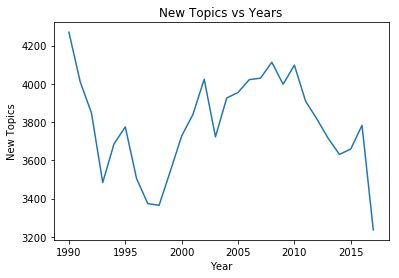

In [23]:
plt.plot(np.arange(28), new_topics_count)
plt.xticks(np.arange(0, 28, 5), np.arange(1990, 2018, 5))
plt.title('New Topics vs Years')
plt.xlabel('Year')
plt.ylabel('New Topics')

## Number of topics in each year

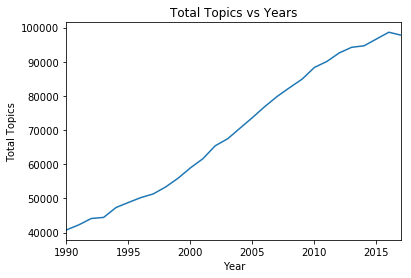

In [24]:
paper_citation_cs.groupby('Year')['FieldOfStudyId'].nunique().plot()
plt.title('Total Topics vs Years')
plt.xlabel('Year')
plt.ylabel('Total Topics')

## Average number of keywords per paper in each year

In [25]:
paper_topic_cs = paper_citation_cs.groupby(['Year', 'PaperId'], as_index = False)['FieldOfStudyId'].count()

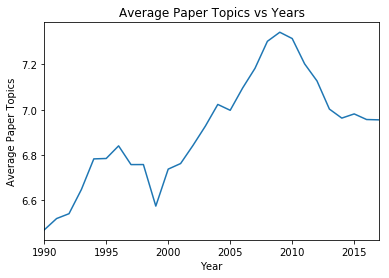

In [26]:
paper_topic_cs.groupby('Year')['FieldOfStudyId'].mean().plot()
plt.title('Average Paper Topics vs Years')
plt.xlabel('Year')
plt.ylabel('Average Paper Topics')

## Average citation (within 5 years) per paper in each year

In [27]:
chunks=pd.read_csv('./All data/mag/PaperReferences.txt',chunksize=1000000,sep='\t', header = None,\
                   names = ['PaperId', 'PaperReferenceId'])

In [28]:
paper_cs_citation = pd.DataFrame()

for chunk in chunks:
    paper_cs_citation= pd.concat([paper_cs_citation,\
                                  chunk[chunk['PaperReferenceId'].isin(paper_citation_cs['PaperId'])]])

In [ ]:
chunks = pd.read_csv('./All data/mag/Papers.txt',chunksize=1000000,sep = '\t', header = None,\
                       names = ['PaperId', 'Rank', 'Doi', 'DocType', 'PaperTitle', 'OriginalTitle', 'BookTitle', 'Year',\
                                'Date', 'Publisher', 'JournalId', 'ConferenceSeriesId', 'ConferenceInstanceId', 'Volume',\
                                'Issue', 'FirstPage', 'LastPage', 'ReferenceCount', 'CitationCount', 'EstimatedCitation',\
                                'OriginalVenue', 'FamilyId', 'CreatedDate'], low_memory = False)

In [ ]:
paper_year = pd.DataFrame()

for chunk in chunks:
    paper_year= pd.concat([paper_year,chunk[(chunk['PaperId'].isin(paper_cs_citation['PaperId'])) |\
                                            (chunk['PaperId'].isin(paper_cs_citation['PaperReferenceId']))]])

In [ ]:
paper_year = paper_year[['PaperId', 'Year']]

In [ ]:
paper_cs_citation_year = paper_cs_citation.merge(paper_year, on = 'PaperId', how = 'left')
paper_cs_citation_year = paper_cs_citation_year.merge(paper_year, left_on = 'PaperReferenceId', right_on = 'PaperId',\
                                                      how = 'left')
paper_cs_citation_year.drop('PaperId_y', axis = 1, inplace = True)
paper_cs_citation_year.rename(columns = {'PaperId_x' : 'PaperId', 'Year_x' : 'Year', 'Year_y' : 'ReferenceYear'},\
                              inplace = True)

In [ ]:
paper_cs_citation_year['Year'].fillna(0, inplace = True)
paper_cs_citation_year['Year'] = pd.to_numeric(paper_cs_citation_year['Year'].str[:4], errors = 'coerce')
paper_cs_citation_year['Year'] = paper_cs_citation_year['Year'].fillna(0)

paper_cs_citation_year['ReferenceYear'] = pd.to_numeric(paper_cs_citation_year['ReferenceYear'].str[:4], errors = 'coerce')
paper_cs_citation_year['ReferenceYear'] = paper_cs_citation_year['ReferenceYear'].fillna(0)
paper_cs_citation_year['ReferenceYear'] = paper_cs_citation_year['ReferenceYear'].astype('int64')

In [ ]:
# Identify citations within 5 years of publication of papers

paper_cs_citation_year_five = paper_cs_citation_year[np.abs((paper_cs_citation_year['Year'] -\
                                                     paper_cs_citation_year['ReferenceYear'])) <= 5]

# Count citation every year

paper_cs_citation_year_five = paper_cs_citation_year_five.groupby(['PaperReferenceId'], as_index = False)['PaperId'].count()
paper_cs_citation_year_five.rename(columns = {'PaperReferenceId' : 'PaperId', 'PaperId' : 'Count'}, inplace = True)

In [ ]:
ref_fiveyear_cs = paper_citation_cs[['PaperId', 'FieldOfStudyId', 'Year']]\
                    .merge(paper_cs_citation_year_five, how = 'right', on = 'PaperId')

In [ ]:
ref_fiveyear_cs= ref_fiveyear_cs[['PaperId', 'Year', 'Count']].drop_duplicates()

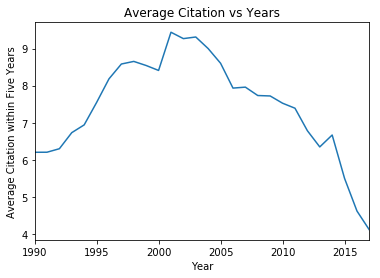

In [40]:
ref_fiveyear_cs.groupby('Year')['Count'].mean().plot()
plt.title('Average Citation vs Years')
plt.xlabel('Year')
plt.ylabel('Average Citation within Five Years')

## Number of papers each year

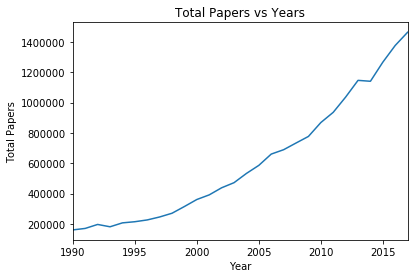

In [41]:
paper_citation_cs.groupby('Year')['PaperId'].nunique().plot()
plt.title('Total Papers vs Years')
plt.xlabel('Year')
plt.ylabel('Total Papers')